<a href="https://colab.research.google.com/github/skillox1/PADSW06MDCD/blob/main/Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Base de Dados Olist - Lista de Exercícios

In [142]:
import pandas as pd
import zipfile
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
%matplotlib inline


In [143]:
!pwd

/content


In [144]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Questões 1 a 8 - Quantas linhas temos em cada tabela?

In [145]:
zf = zipfile.ZipFile('/content/gdrive/MyDrive/archive.zip') 
df_orders = pd.read_csv(zf.open('olist_orders_dataset.csv'))
df_order_items = pd.read_csv(zf.open('olist_order_items_dataset.csv'))
df_customers = pd.read_csv(zf.open('olist_customers_dataset.csv'))
df_sellers = pd.read_csv(zf.open('olist_sellers_dataset.csv'))
df_products = pd.read_csv(zf.open('olist_products_dataset.csv'))
df_order_payments = pd.read_csv(zf.open('olist_order_payments_dataset.csv'))
df_order_reviews = pd.read_csv(zf.open('olist_order_reviews_dataset.csv'))
df_geolocation = pd.read_csv(zf.open('olist_geolocation_dataset.csv'))



In [146]:
dfs = [df_orders,df_order_items,df_customers,df_sellers,df_products,df_order_payments,df_order_reviews,df_geolocation]

In [147]:
for x in dfs:
  print(x.shape[0])

99441
112650
99441
3095
32951
103886
99224
1000163


In [148]:
datasets = [df_orders,df_order_items,df_customers,df_sellers,df_products,df_order_payments,df_order_reviews,df_geolocation]
titles = ["orders","items","customers","sellers","products","payments","reviews","geolocation"]

info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Blues')

,dataset,no_of_columns,columns_name,no_of_rows
0,orders,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
1,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
2,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
3,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
4,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
5,payments,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
6,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224
7,geolocation,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163


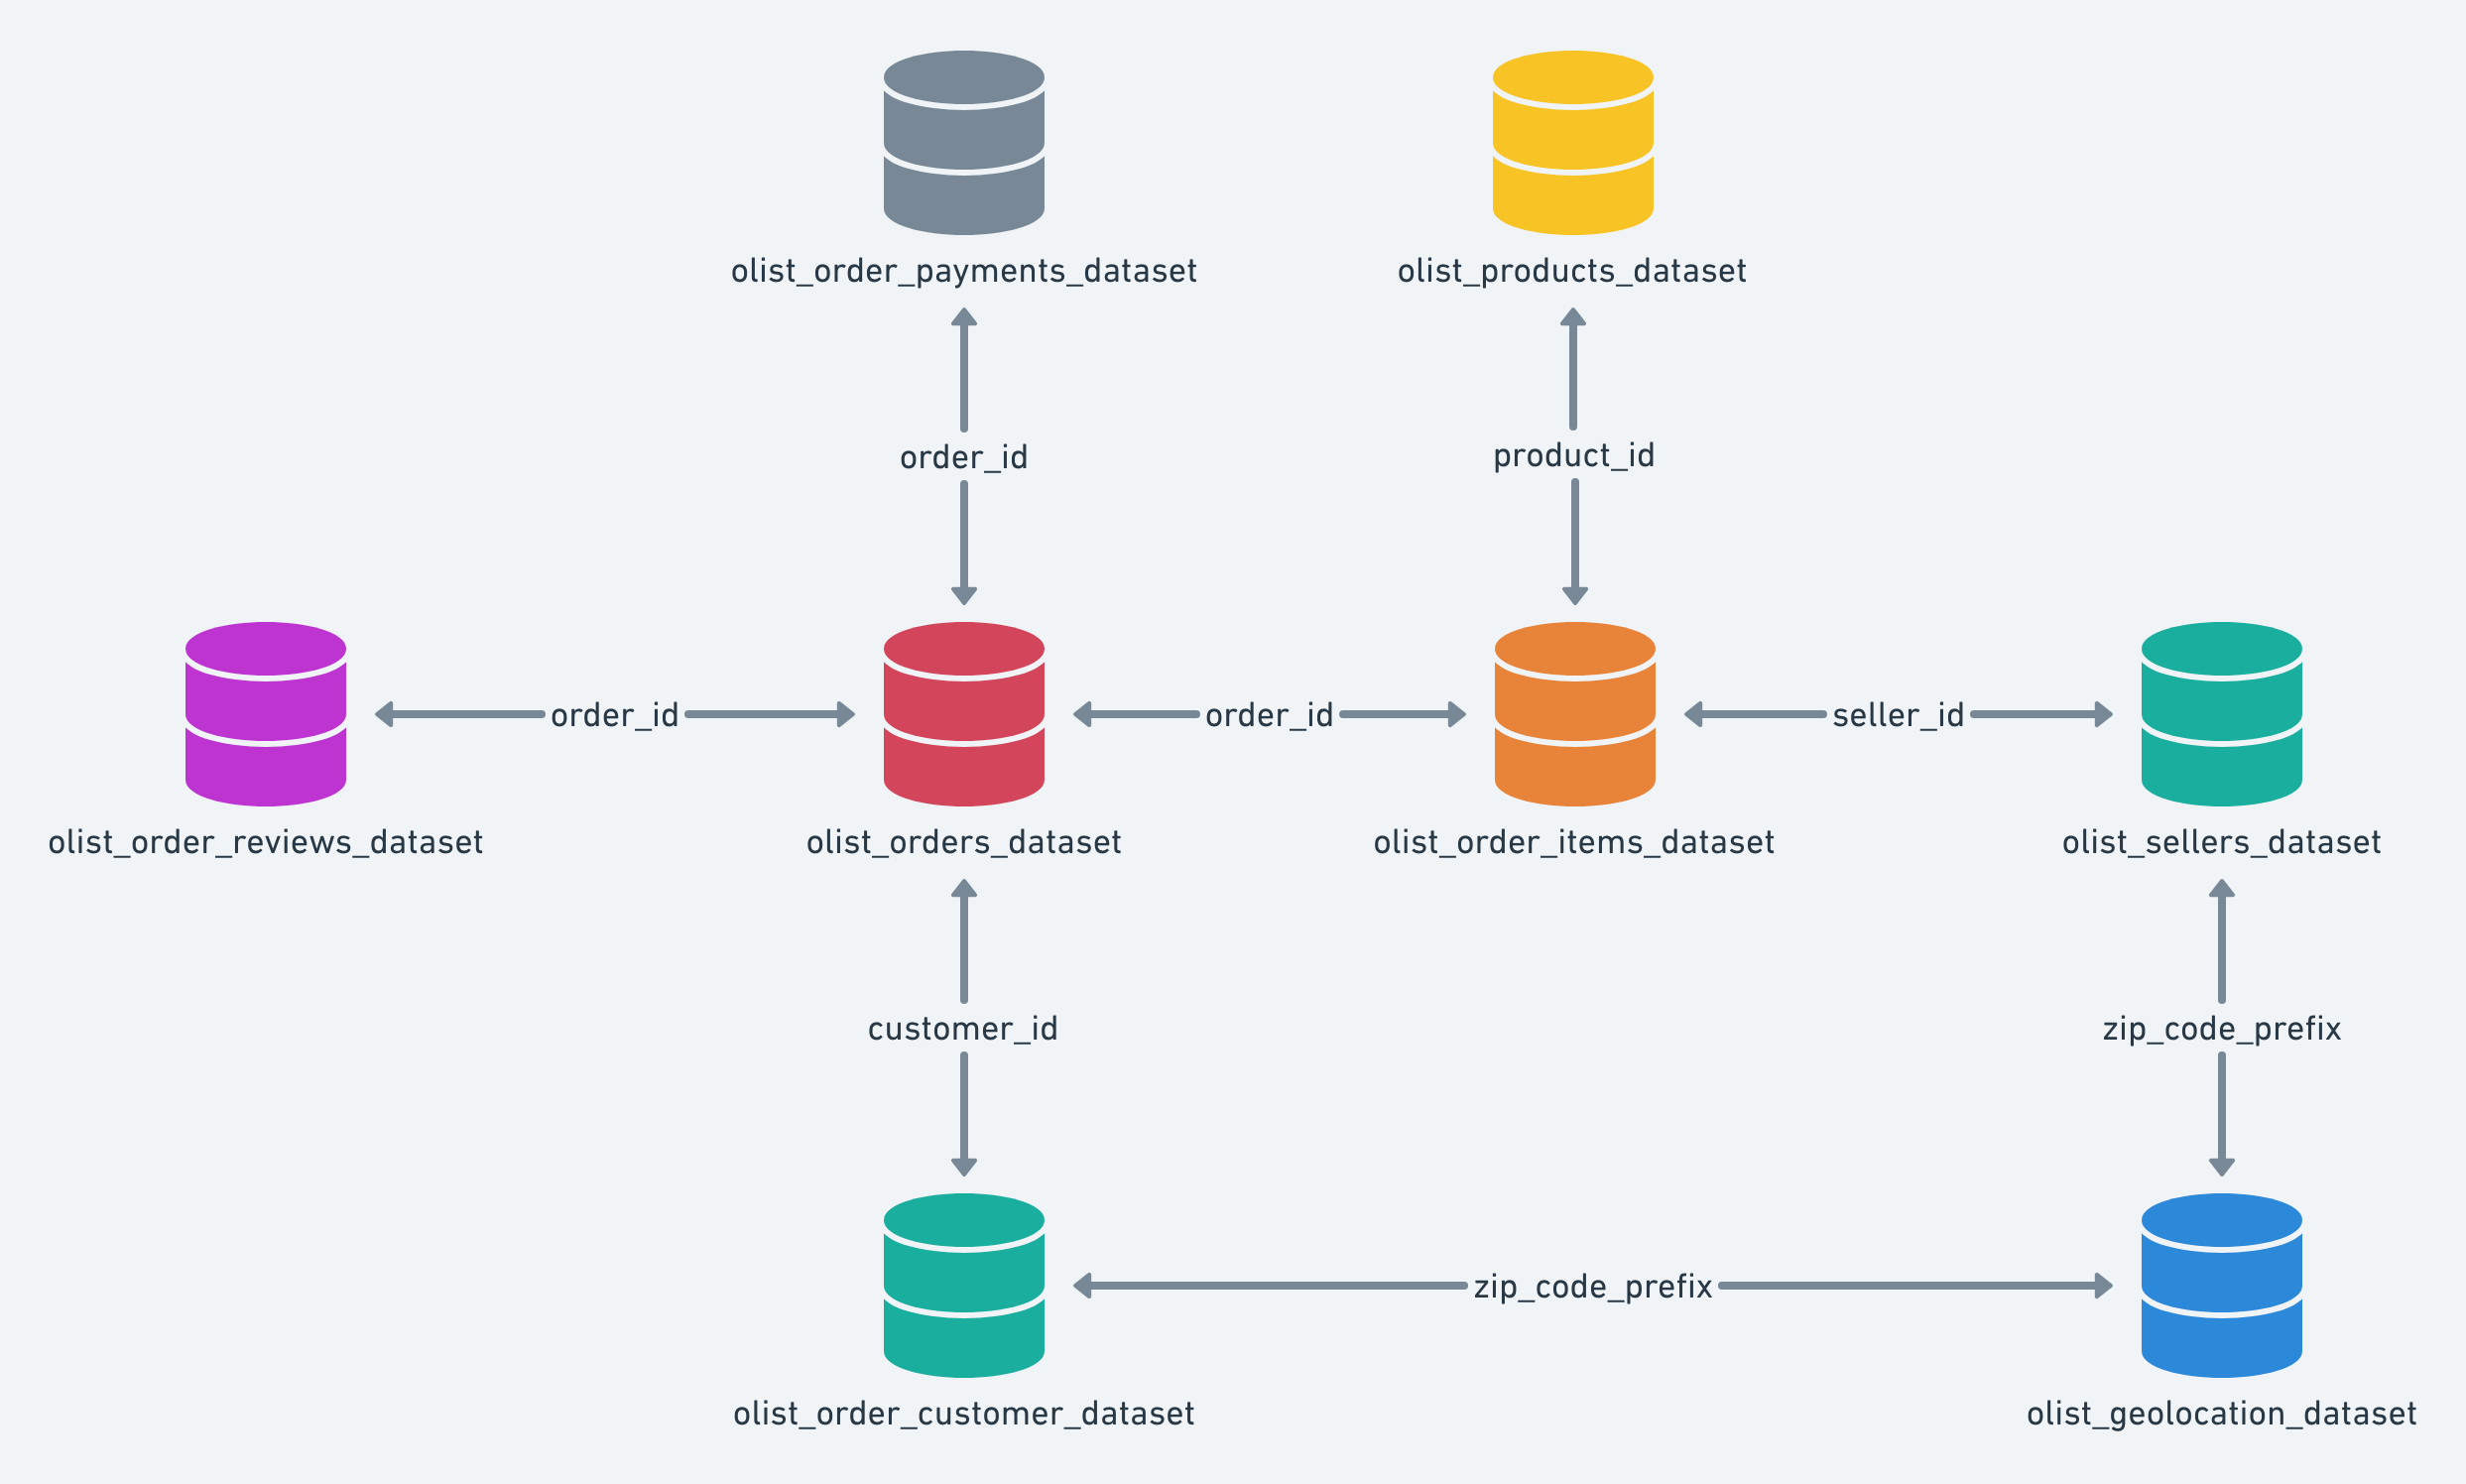

9 - Quantos Ceps únicos temos no banco de dados?

In [149]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [150]:
df_geolocation.geolocation_zip_code_prefix.nunique()

19015

10 - Quantas latitudes e longitudes estão expressas na base de dados?

In [151]:
df_geolocation.geolocation_lat.value_counts().sum()

1000163

In [152]:
df_geolocation.geolocation_lng.value_counts().sum()

1000163

11 - Crie um método para agrupar todas as diferentes latitudes e longitudes que um determinado CEP possui
para um valor único por CEP. Dica Use a função **group_by** e **aggregate**

In [153]:
df_geolocation = df_geolocation.rename(columns={"geolocation_zip_code_prefix":"zip_code"})

In [154]:
df_geolocation.groupby("zip_code").head()

,zip_code,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
999961,99960,-27.953858,-52.031943,charrua,RS
999996,99952,-28.182027,-51.880215,santa cecilia do sul,RS
1000008,99925,-27.936330,-52.425730,ipiranga do sul,RS
1000067,99965,-28.174697,-52.035508,agua santa,RS


In [155]:
df_geolocation.groupby("zip_code").agg({"geolocation_lat":["mean"],"geolocation_lng":["mean"]})
                                                           

,geolocation_lat,geolocation_lng
,mean,mean
zip_code,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979
1003,-23.548994,-46.635731
1004,-23.549799,-46.634757
1005,-23.549456,-46.636733
...,...,...
99960,-27.953722,-52.025511
99965,-28.183372,-52.039850


In [156]:
df_geolocation = df_geolocation.groupby("zip_code").agg({"geolocation_lat":["mean"],"geolocation_lng":["mean"]}).drop_duplicates()
                                                          

In [157]:
print(df_geolocation.duplicated(keep=False).sum())

0


12 - Crie um método para agregar todas as tabelas disponíveis em uma única tabela

In [158]:
df_customers.rename(columns={"customer_zip_code_prefix": "zip_code"}, inplace=True)


In [159]:
olist = df_orders.merge(df_customers, on="customer_id").merge(df_geolocation, on="zip_code").merge(df_order_items, on="order_id").merge(df_products, on="product_id").merge\
      (df_order_payments, on="order_id").merge(df_sellers, on="seller_id").merge(df_order_reviews, on="order_id")
      
      

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  validate=validate,


In [160]:
olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,44.09,9350,maua,SP,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38
4,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36


13 -  Quantas ordens distintas temos em nosso banco de dados?

In [161]:
olist.order_id.nunique()

97642

14 - Quantos clientes distintos existem em nosso banco de dados?

In [162]:
olist.customer_id.nunique()

97642

15 - Quantos vendedores distintos existem em nosso bando de dados?

In [163]:
olist.seller_id.nunique()

3090

16 - Qual a porcentagem de vendas feitas com cartão de crédito?

In [164]:
olist.payment_type.value_counts()

credit_card    86281
boleto         22770
voucher         6267
debit_card      1691
Name: payment_type, dtype: int64

In [165]:
olist.payment_type.value_counts().loc["credit_card"]/olist.payment_type.value_counts().sum()

0.7373877223119589

17 - Qual a porcentagem de vendas feitas com cartão de débito?

In [167]:
olist.payment_type.value_counts().loc["debit_card"]/olist.payment_type.value_counts().sum()

0.014451879769932228

18 - Qual a porcentagem de reviews menor do que 2 estrelas temos em nossa base?

In [168]:
olist.review_score.value_counts()

5    66085
4    22224
1    14809
3     9818
2     4073
Name: review_score, dtype: int64

In [169]:
olist.review_score.value_counts().loc[1]/olist.review_score.value_counts().sum()

0.1265629139638831

19 - Quantas categorias de produto distintas existem em nossa base?

In [170]:
olist.product_category_name.nunique()

73

20 - Qual a média de scores por categoria de produto?

In [171]:
olist.groupby("product_category_name").agg({"review_score":["mean"]})

,review_score
,mean
product_category_name,
agro_industria_e_comercio,4.150794
alimentos,4.228346
alimentos_bebidas,4.324138
artes,3.935484
artes_e_artesanato,4.125000
...,...
sinalizacao_e_seguranca,4.040816
tablets_impressao_imagem,4.117647


21 - Quais as 5 categorias que mais possuem produtos em nossa base?

In [172]:
olist.product_category_name.value_counts()

cama_mesa_banho                                  11819
beleza_saude                                      9914
esporte_lazer                                     8925
moveis_decoracao                                  8725
informatica_acessorios                            8071
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicais                                   14
pc_gamer                                            10
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: product_category_name, Length: 73, dtype: int64

22 - Quantos comentários existem na base?

In [173]:
olist.review_comment_message.count()

49549

In [174]:
olist.review_comment_message.isna().sum()

67460

In [175]:
olist.shape[0]

117009

23 - Crie uma nuvem de palavras que mostre as principais informações contidas nos comentários.

In [176]:
to_cloud = olist.copy()


In [177]:
to_cloud['review_comment_message'] = to_cloud['review_comment_message'].astype(str)
to_cloud = to_cloud.dropna(subset=['review_comment_message'])
to_cloud = to_cloud[to_cloud['review_comment_message'] != 'nan']

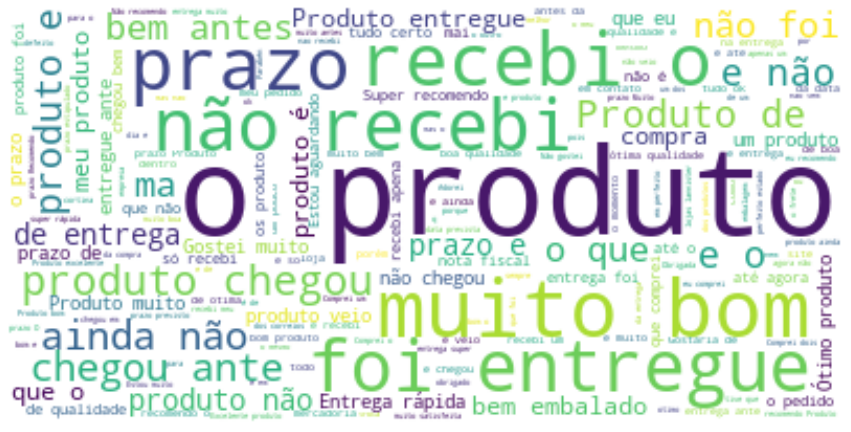

In [178]:
text = " ".join(to_cloud['review_comment_message'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

24 - Qual a porcentagem de ordens entregues?

In [179]:
olist.order_status.value_counts()

delivered      114553
shipped          1160
canceled          548
invoiced          369
processing        369
unavailable         7
approved            3
Name: order_status, dtype: int64

In [180]:
olist.order_status.value_counts().loc["delivered"]/olist.order_status.value_counts().sum()

0.9790101616115

25 - Qual o tempo médio entre a compra e a aprovação da compra?

In [181]:
olist.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117009 entries, 0 to 117008
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117009 non-null  object 
 1   customer_id                    117009 non-null  object 
 2   order_status                   117009 non-null  object 
 3   order_purchase_timestamp       117009 non-null  object 
 4   order_approved_at              116994 non-null  object 
 5   order_delivered_carrier_date   115781 non-null  object 
 6   order_delivered_customer_date  114552 non-null  object 
 7   order_estimated_delivery_date  117009 non-null  object 
 8   customer_unique_id             117009 non-null  object 
 9   zip_code                       117009 non-null  int64  
 10  customer_city                  117009 non-null  object 
 11  customer_state                 117009 non-null  object 
 12  (geolocation_lat, mean)       

In [182]:
cols = olist.columns[3:8]

In [183]:
cols

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [184]:
olist[cols] = olist[cols].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S', errors = "coerce")

In [185]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117009 entries, 0 to 117008
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117009 non-null  object        
 1   customer_id                    117009 non-null  object        
 2   order_status                   117009 non-null  object        
 3   order_purchase_timestamp       117009 non-null  datetime64[ns]
 4   order_approved_at              116994 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115781 non-null  datetime64[ns]
 6   order_delivered_customer_date  114552 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117009 non-null  datetime64[ns]
 8   customer_unique_id             117009 non-null  object        
 9   zip_code                       117009 non-null  int64         
 10  customer_city                  117009 non-null  object        
 11  

In [186]:
(olist.isna().sum() / len(olist) ).sort_values(ascending=False)

review_comment_title             0.881659
review_comment_message           0.576537
order_delivered_customer_date    0.020998
product_category_name            0.014435
product_name_lenght              0.014435
product_photos_qty               0.014435
product_description_lenght       0.014435
order_delivered_carrier_date     0.010495
product_width_cm                 0.000171
product_height_cm                0.000171
product_length_cm                0.000171
product_weight_g                 0.000171
order_approved_at                0.000128
review_score                     0.000000
review_id                        0.000000
seller_state                     0.000000
seller_zip_code_prefix           0.000000
payment_value                    0.000000
payment_installments             0.000000
payment_type                     0.000000
payment_sequential               0.000000
review_creation_date             0.000000
seller_city                      0.000000
order_id                         0

In [187]:
olist["delta_approval"] = olist.order_approved_at - olist.order_purchase_timestamp

In [188]:
olist.delta_approval.mean()

Timedelta('0 days 10:29:48.026881720')

In [189]:
olist.delta_approval.describe()

count                       116994
mean     0 days 10:29:48.026881720
std      0 days 22:13:52.682657296
min                0 days 00:00:00
25%                0 days 00:12:56
50%                0 days 00:20:48
75%         0 days 14:59:16.500000
max               60 days 10:51:59
Name: delta_approval, dtype: object

26 - Qual o tempo médio entre a compra e a entrega?

In [190]:
olist["delta_delivery"] = olist.order_delivered_customer_date - olist.order_purchase_timestamp

In [191]:
olist.delta_delivery.mean()

Timedelta('12 days 10:28:49.342988337')

27 - Qual a diferença média entre a data prevista de entrega e a data efetiva de entrega?

In [192]:
olist["delta_forecast"] = olist.order_delivered_customer_date - olist.order_estimated_delivery_date

In [193]:
olist.delta_forecast.mean()

Timedelta('-12 days +14:37:09.768114045')

In [194]:
olist.delta_forecast.describe()

count                          114552
mean     -12 days +14:37:09.768114045
std        10 days 02:16:38.757732168
min               -147 days +23:36:47
25%                -17 days +16:18:26
50%                -13 days +22:23:31
75%                 -7 days +10:47:47
max                 188 days 23:24:07
Name: delta_forecast, dtype: object

28 - Em qual período do dia as pessoas mais costumam fazer compras por estado? Divida entre manhã,
tarde e noite.

In [195]:
olist.order_purchase_timestamp.head(5)

0   2017-10-02 10:56:33
1   2017-10-02 10:56:33
2   2017-10-02 10:56:33
3   2017-10-23 23:26:46
4   2017-08-15 18:29:31
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [196]:
olist['period'] = (olist['order_purchase_timestamp'].dt.hour % 24 + 4) // 4
olist['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [197]:
olist.iloc[:,[3,44]]

,order_purchase_timestamp,period
0,2017-10-02 10:56:33,Morning
1,2017-10-02 10:56:33,Morning
2,2017-10-02 10:56:33,Morning
3,2017-10-23 23:26:46,Night
4,2017-08-15 18:29:31,Evening
...,...,...
117004,2017-02-17 03:09:22,Late Night
117005,2017-07-02 13:10:36,Noon
117006,2016-10-09 12:13:58,Noon
117007,2018-02-25 17:37:45,Evening


In [198]:
olist.groupby("customer_state").agg({"period":(pd.Series.mode)})

,period
customer_state,
AC,Noon
AL,Noon
AM,Evening
AP,Evening
BA,Evening
CE,Noon
DF,Evening
ES,Evening
GO,Noon


29 - Quais os diferentes tipos de dados temos em nossa tabela?

In [199]:
olist.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117009 entries, 0 to 117008
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       117009 non-null  object         
 1   customer_id                    117009 non-null  object         
 2   order_status                   117009 non-null  object         
 3   order_purchase_timestamp       117009 non-null  datetime64[ns] 
 4   order_approved_at              116994 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   115781 non-null  datetime64[ns] 
 6   order_delivered_customer_date  114552 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  117009 non-null  datetime64[ns] 
 8   customer_unique_id             117009 non-null  object         
 9   zip_code                       117009 non-null  int64          
 10  customer_city                  117009 non-null  object  

30 - Quantos clientes distintos temos por estado?

In [200]:
olist.groupby("customer_state").agg({"customer_unique_id":(pd.Series.count)})

,customer_unique_id
customer_state,
AC,95
AL,458
AM,170
AP,83
BA,4002
CE,1535
DF,2286
ES,2313
GO,2407


31 - Quantos vendedores distintos temos por estado?

In [201]:
olist.groupby("seller_state").agg({"seller_id":(pd.Series.count)})

,seller_id
seller_state,
AC,1
AM,3
BA,693
CE,102
DF,946
ES,385
GO,545
MA,401
MG,9204


32 - Quantos clientes distintos temos na região metropolitana de São Paulo?

In [202]:
metropol = ["sao paulo","aruja","biritiba mirim","caieiras","cajamar","carapicuiba","cotia","diadema","embu","embu guacu","ferraz de vasconcelos ","francisco morato",
            "franco da rocha","guararema","guarulhos","itapecerica da serra","itapevi","itaquaquecetuba","jandira","juquitiba","mairipora","maua","mogi das cruzes",
            "osasco","pirapora do bom jesus","poa","ribeirao pires","rio grande da serra","salesopolis","santa isabel","santana do parnaiba","santo andre","sao bernardo do campo",
            "sao caetano do sul","sao lourenco da serra","suzano","taboao da serra","vargem grande paulista"]

In [203]:
olist[olist['customer_city'].isin(metropol)].groupby("customer_city").agg({"customer_unique_id":(pd.Series.count)})

,customer_unique_id
customer_city,
aruja,78
caieiras,107
cajamar,121
carapicuiba,393
cotia,284
diadema,349
embu,16
francisco morato,111
franco da rocha,119


In [204]:
olist[olist['customer_city'].isin(metropol)].groupby("customer_city").agg({"customer_unique_id":(pd.Series.count)}).sum()

customer_unique_id    27339
dtype: int64

33 - Qual a média de valor, por estado, que os clientes atribuem aos vendedores?

In [205]:
olist.groupby("customer_state").agg({"review_score":["mean"]})

,review_score
,mean
customer_state,
AC,4.094737
AL,3.716157
AM,4.082353
AP,4.240964
BA,3.819840
CE,3.829316
DF,3.999563
ES,3.983139


34 - Qual o valor médio de frete cobrado por estado?

In [ ]:
olist.groupby("customer_state").agg({"freight_value":["mean"]})

,freight_value
,mean
customer_state,
AC,40.021684
AL,35.588668
AM,33.118765
AP,34.200120
BA,26.338441
CE,32.515818
DF,21.093036
ES,21.919131


35 - Trace um histograma de preços divididos em 4 quantis.

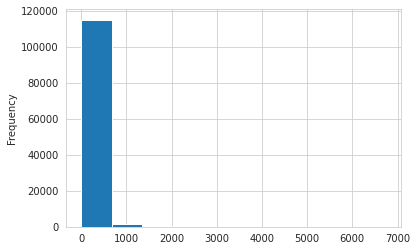

In [ ]:
sns.set_style('whitegrid')
olist['price'].plot(kind='hist')

In [209]:
q = olist.quantile([0.00, 0.25, 0.50, 0.75, 1.00])

col = "price"

q1 = olist[((olist[col]>=q[col][0.00]) & (olist[col]<q[col][0.25]))]
q2 = olist[((olist[col]>=q[col][0.25]) & (olist[col]<q[col][0.50]))]
q3 = olist[((olist[col]>=q[col][0.50]) & (olist[col]<q[col][0.75]))]
q4 = olist[((olist[col]>=q[col][0.75]) & (olist[col]<=q[col][1.00]))]
   

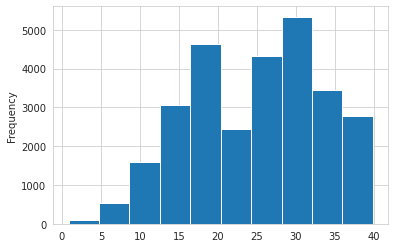

In [210]:
sns.set_style('whitegrid')
q1['price'].plot(kind='hist')


36 - Trace um histograma de preços divididos em 10 quantis.

In [ ]:
q_2 = olist.quantile([0.00, 0.10, 0.20, 0.30, 0.40, 0.50,0.60,0.70,0.80,0.9,1.00])

col = "price"

q1_10 = olist[((olist[col]>=q_2[col][0.00]) & (olist[col]<q_2[col][0.10]))]
q2_10 = olist[((olist[col]>=q_2[col][0.10]) & (olist[col]<q_2[col][0.20]))]
q3_10 = olist[((olist[col]>=q_2[col][0.20]) & (olist[col]<q_2[col][0.30]))]
q4_10 = olist[((olist[col]>=q_2[col][0.30]) & (olist[col]<q_2[col][0.40]))]
q5_10 = olist[((olist[col]>=q_2[col][0.40]) & (olist[col]<q_2[col][0.50]))]
q6_10 = olist[((olist[col]>=q_2[col][0.50]) & (olist[col]<q_2[col][0.60]))]
q7_10 = olist[((olist[col]>=q_2[col][0.60]) & (olist[col]<q_2[col][0.70]))]
q8_10 = olist[((olist[col]>=q_2[col][0.70]) & (olist[col]<q_2[col][0.80]))]
q9_10 = olist[((olist[col]>=q_2[col][0.80]) & (olist[col]<q_2[col][0.90]))]
q10_10 = olist[((olist[col]>=q_2[col][0.90]) & (olist[col]<=q_2[col][1.00]))]

In [ ]:
pd.cut(olist['price'], bins=10).value_counts()

(-5.884, 674.265]      114952
(674.265, 1347.68]       1586
(1347.68, 2021.095]       344
(2021.095, 2694.51]        79
(2694.51, 3367.925]        28
(3367.925, 4041.34]        12
(4041.34, 4714.755]         5
(6061.585, 6735.0]          2
(4714.755, 5388.17]         1
(5388.17, 6061.585]         0
Name: price, dtype: int64

37 - Qual a porcentagem de vendas é feita no estado de São Paulo e estão no primeiro quartil?

In [ ]:
q4.customer_state.value_counts().loc["SP"]/q4.customer_state.value_counts().sum()

0.3781446540880503

In [216]:
q4.customer_state.value_counts()

SP    11063
RJ     4011
MG     3388
RS     1639
PR     1467
BA     1155
SC     1072
GO      624
PE      596
ES      592
DF      588
CE      516
PA      385
MT      367
MA      278
PB      243
MS      219
RN      200
PI      193
AL      175
SE      127
TO      121
RO      101
AM       52
AC       39
AP       25
RR       20
Name: customer_state, dtype: int64

In [ ]:
q4.customer_state.value_counts().sum()

29256

38 - Qual o valor médio das compras no primeiro quantil?

In [217]:
q10_10.price.mean()

492.7094412644169

In [218]:
q10_10.price.describe()

count    11705.000000
mean       492.709441
std        395.414581
min        229.800000
25%        276.990000
50%        349.900000
75%        557.000000
max       6735.000000
Name: price, dtype: float64

39 - Considerando uma base de 6.000.000 de clientes na Olist, qual a quantidade de clientes no primeiro
quartil e de São Paulo podemos atingir?

In [222]:
q4_sp = q4[q4["customer_state"] == "SP"]

In [224]:
q4_sp.customer_unique_id.count()

11063

40 - Qual o TAM (Tamanho de Mercado) no contexto descrito anteriormente?